In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors, linear_model, metrics
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier


plt.style.use('ggplot')

In [121]:
df1 = pd.read_csv("wdbc.data", header = None, 
                   names = ['id', 'diagnosis', 
                            'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
                            'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
                            'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'])

#df1.set_index(df1.iloc[0], drop= False)
X=df1.drop(labels=['id','diagnosis'],axis=1)
#print(X)

y=df1['diagnosis']
#print(y)

#df1.info()

In [122]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [123]:
print ("Total number of diagnosis are ", str(df1.shape[0]), ", ", df1.diagnosis.value_counts()['B'], "Benign and Malignant are",
       df1.diagnosis.value_counts()['M'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


### Finding the correlation between columns

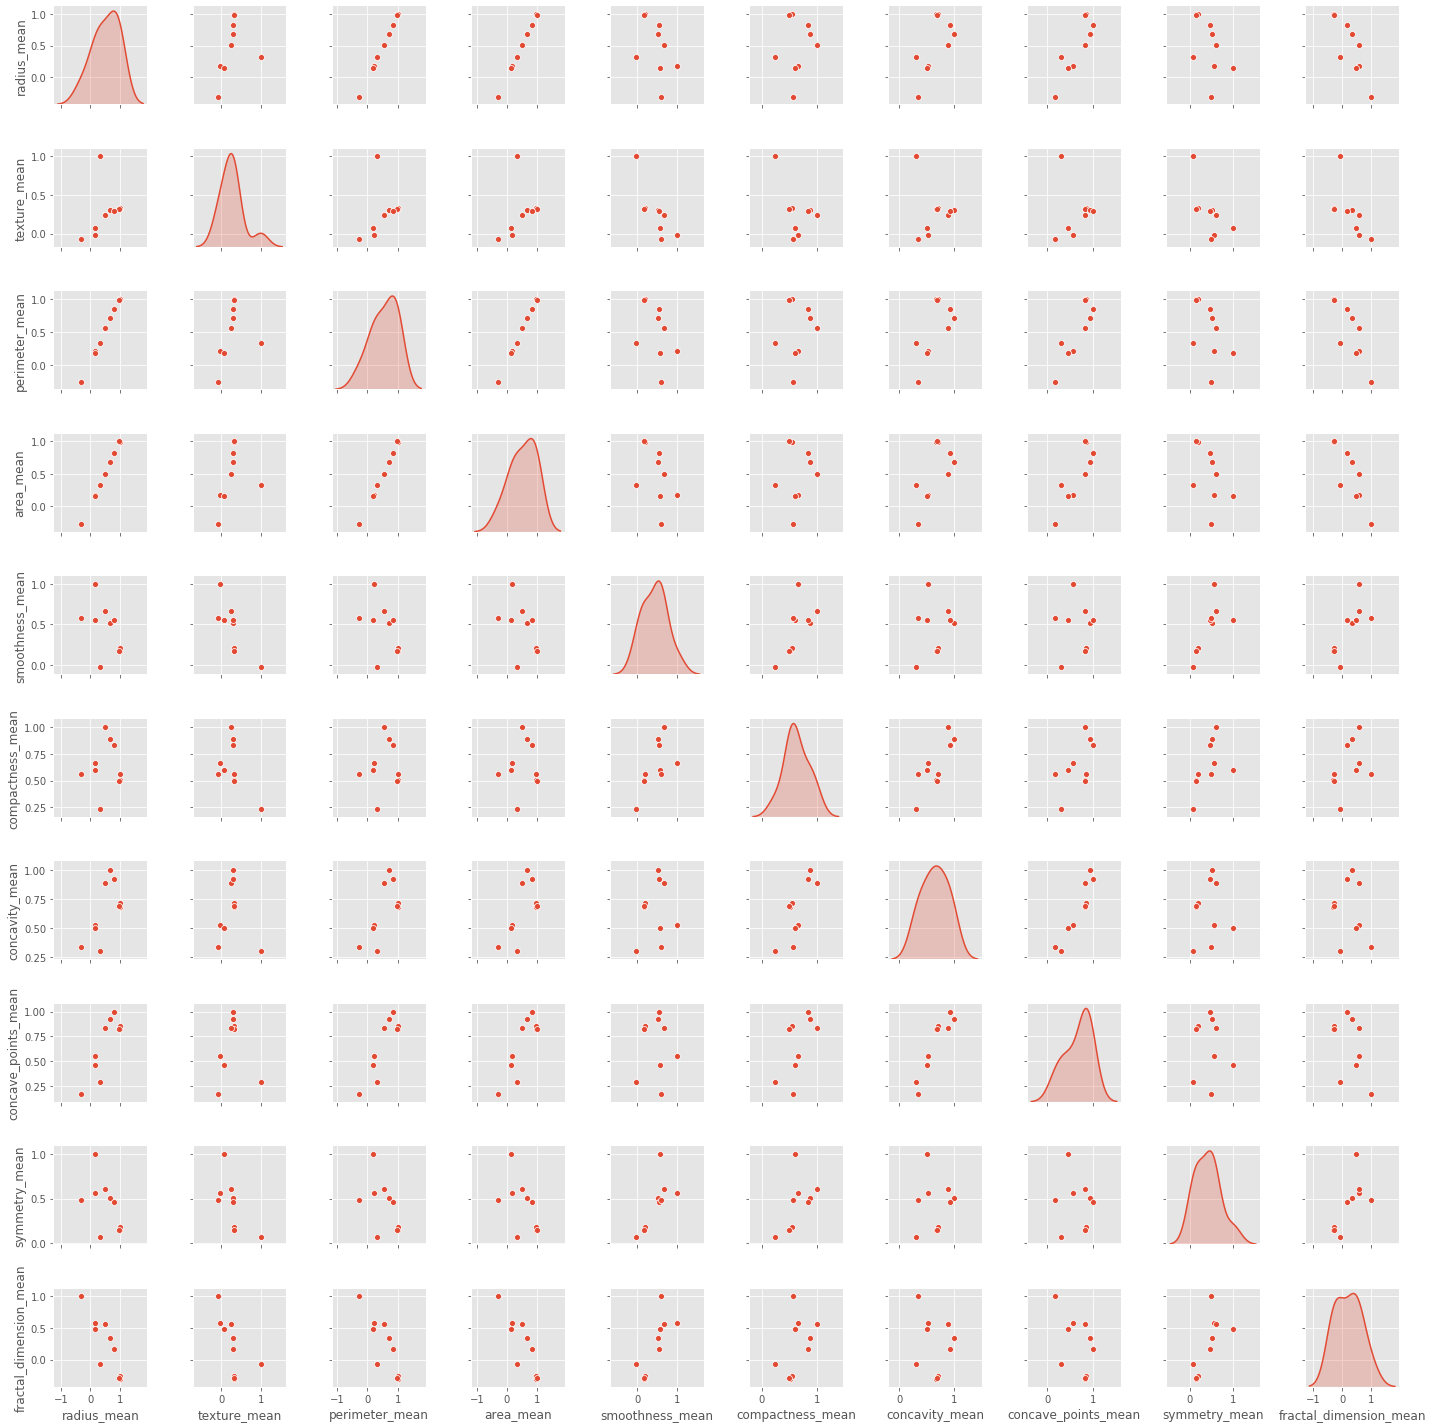

In [124]:
featureMeans = list(X.columns[0:10])

import seaborn as sns
correlationData = X[featureMeans].corr()
sns.pairplot(X[featureMeans].corr(), diag_kind='kde', height=2); 

### Heatmap

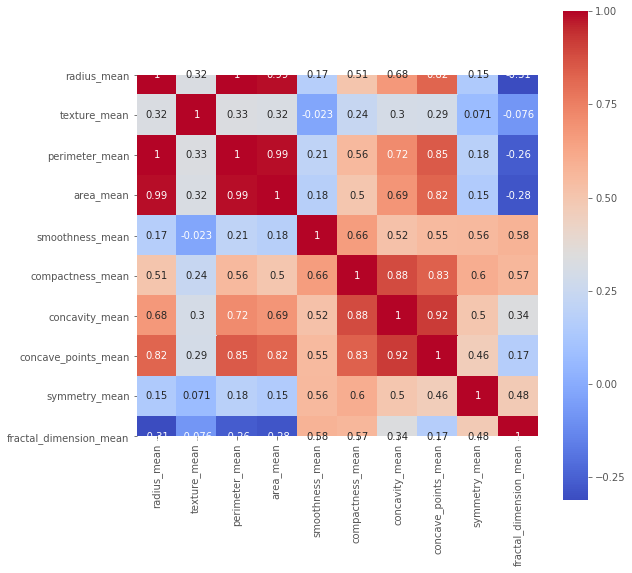

In [125]:
plt.figure(figsize=(9,9))
sns.heatmap(X[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

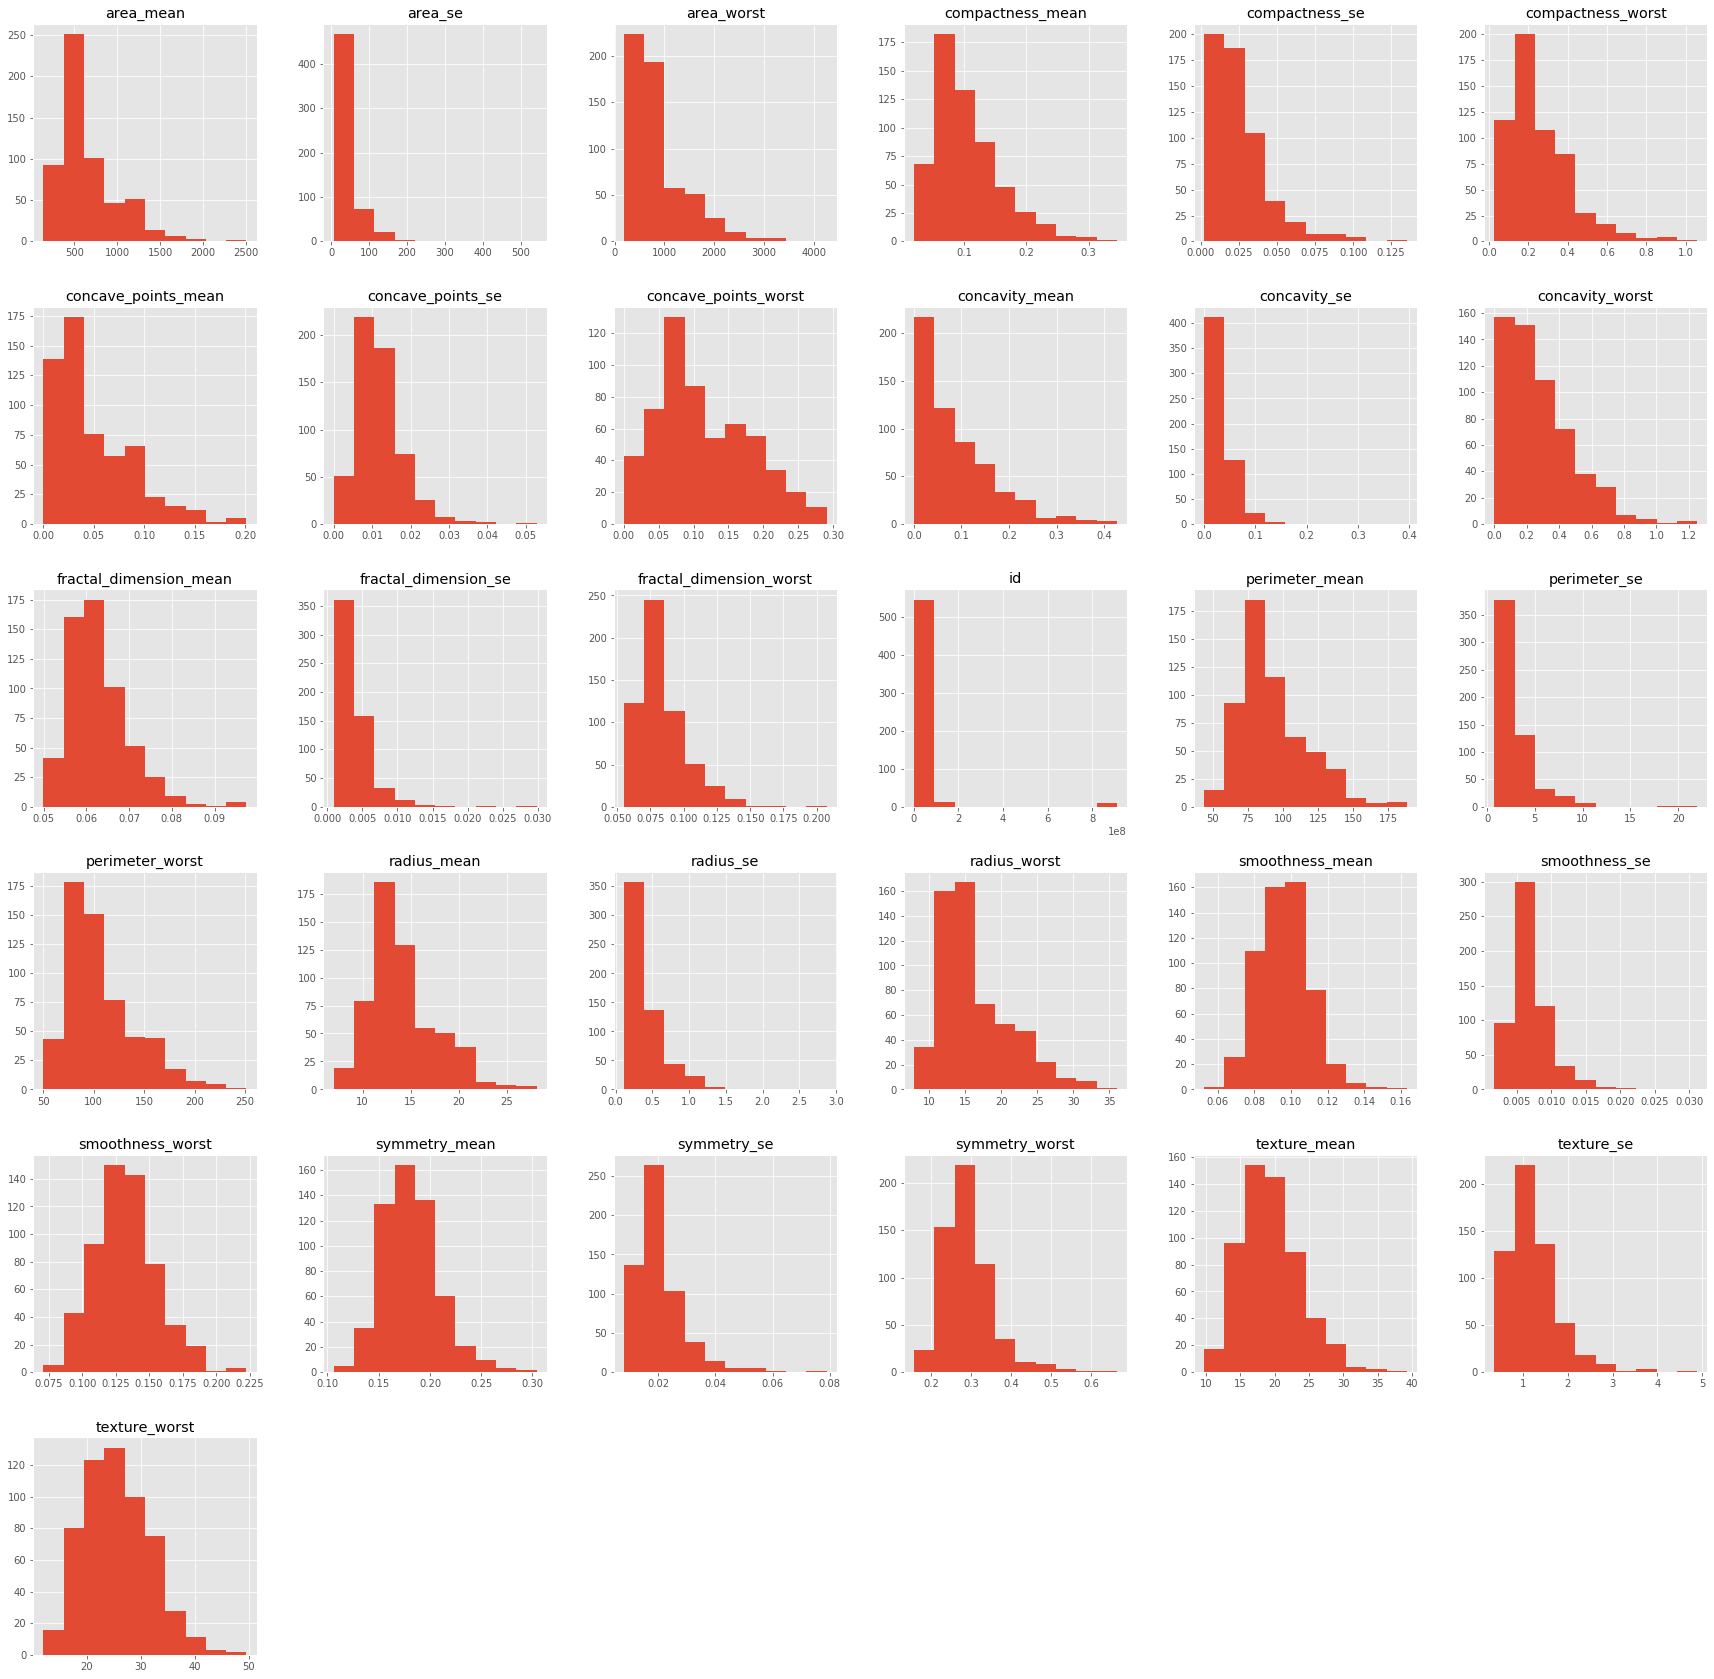

In [126]:
pd.DataFrame.hist(df1, figsize = [30,30]);

### Distribution of each type of diagnosis for some of the mean features

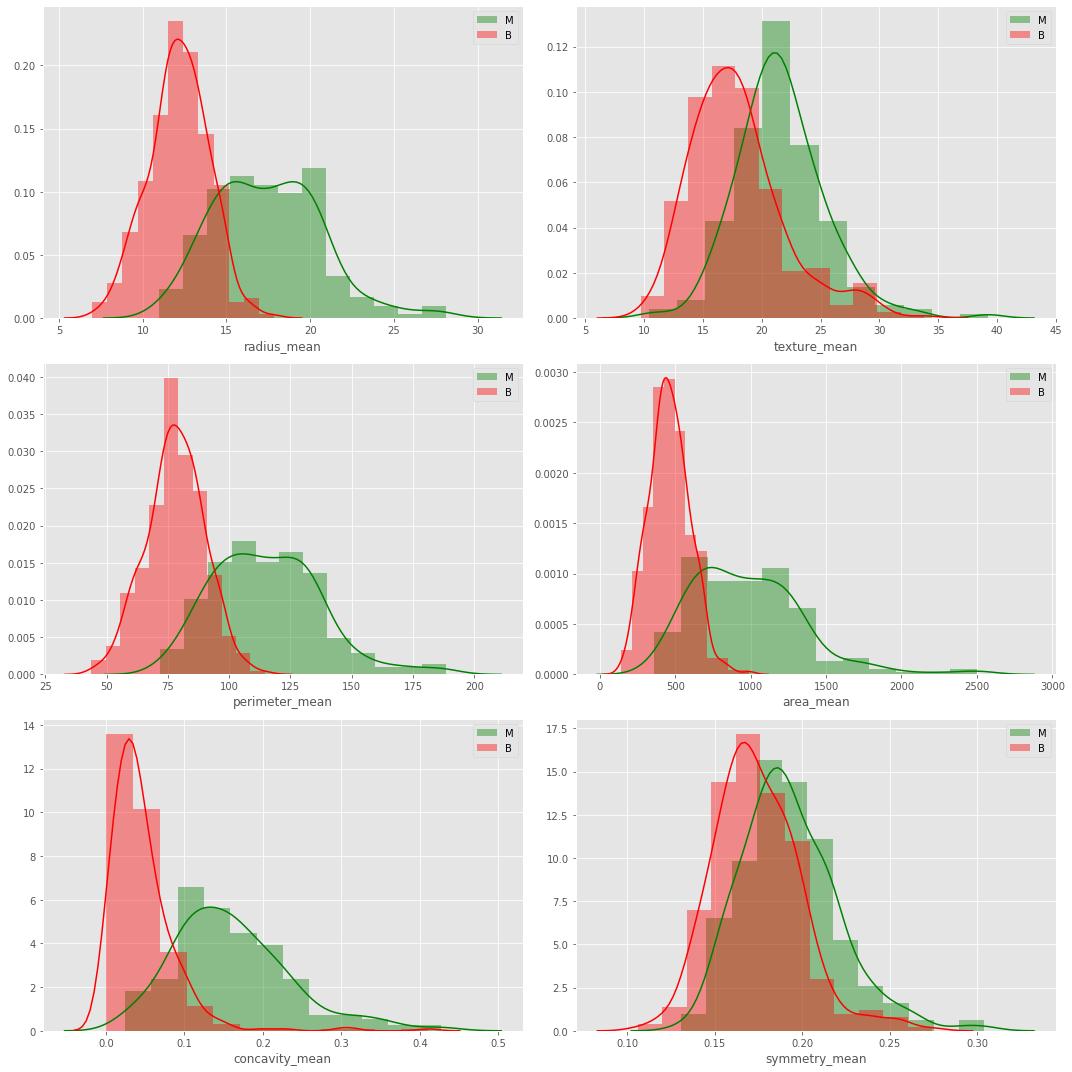

In [127]:
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(df1[df1['diagnosis']=='M']['radius_mean'], bins=bins, color='green', label='M')
sns.distplot(df1[df1['diagnosis']=='B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(df1[df1['diagnosis']=='M']['texture_mean'], bins=bins, color='green', label='M')
sns.distplot(df1[df1['diagnosis']=='B']['texture_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(df1[df1['diagnosis']=='M']['perimeter_mean'], bins=bins, color='green', label='M')
sns.distplot(df1[df1['diagnosis']=='B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.distplot(df1[df1['diagnosis']=='M']['area_mean'], bins=bins, color='green', label='M')
sns.distplot(df1[df1['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.distplot(df1[df1['diagnosis']=='M']['concavity_mean'], bins=bins, color='green', label='M')
sns.distplot(df1[df1['diagnosis']=='B']['concavity_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.distplot(df1[df1['diagnosis']=='M']['symmetry_mean'], bins=bins, color='green', label='M')
sns.distplot(df1[df1['diagnosis']=='B']['symmetry_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

----

## Algorithm Models

### kNN Model 1 - regular (without scaling X)

In [133]:
# y = y1 < 3  # is the rating <= 3? # creating a circle of 2

# Splitting data into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = KNeighborsClassifier()
# knn = clf(n_neighbors = 5)
# knn_model_1 = knn.fit(X_train, y_train)
knn_model_1 = clf.fit(X_train, y_train)
predict_knn_1 = clf.predict(X_test)

print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))
print('k-NN score for training set: %f' % knn_model_1.score(Xs_train, y_train))
print ('\n')

# Classification report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))
print ('\n')

# Confusion Matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predict_knn_1))

k-NN accuracy for test set: 0.953216
k-NN score for training set: 0.605528


              precision    recall  f1-score   support

           B       0.97      0.96      0.97       116
           M       0.91      0.95      0.93        55

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Confusion matrix:
[[111   5]
 [  3  52]]


## Scale X into Xs and splitting the dataset

In [134]:
Xs = scale(X)

#Splitting data into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3)

### kNN Model 2 - Normalized using scale

In [135]:
# clf = KNeighborsClassifier()

knn_model_2 = clf.fit(X_train, y_train)
predict_knn_2 = clf.predict(X_test)

print('k-NN accuracy for test set: %f' % knn_model_2.score(X_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
print ('\n')

# Classification report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))
print ('\n')

# Confusion Matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predict_knn_2))

k-NN accuracy for test set: 0.976608
k-NN score for training set: 0.567839


              precision    recall  f1-score   support

           B       0.97      0.99      0.98       108
           M       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Confusion matrix:
[[107   1]
 [  3  60]]


### Decision Tree Algorithm

In [136]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model = dt.fit(X_train, y_train)
predict_dt = dt.predict(X_test)


print('Decision Tree Model accuracy for test set: %f' % dt_model.score(X_test, y_test))
print('Decision Tree Model score for training set: %f' % dt_model.score(X_train, y_train))
print ('\n')
       
# Classification report
y_true, y_pred = y_test, dt_model.predict(X_test)
print(classification_report(y_true, y_pred))
print ('\n')

# Confusion Matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predict_dt))

Decision Tree Model accuracy for test set: 0.929825
Decision Tree Model score for training set: 1.000000


              precision    recall  f1-score   support

           B       0.95      0.94      0.94       108
           M       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



Confusion matrix:
[[101   7]
 [  5  58]]


### Logistic Regression Algorithm

In [137]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'lbfgs', random_state = 0)
lr_model = lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)

print('Logistic Regression Model accuracy for test set: %f' % lr_model.score(X_test, y_test))
print('Logistic Regression Model score for training set: %f' % lr_model.score(X_train, y_train))
print ('\n')

# Classification report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))
print ('\n')

# Confusion Matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predict_lr))

Logistic Regression Model accuracy for test set: 0.982456
Logistic Regression Model score for training set: 0.984925


              precision    recall  f1-score   support

           B       0.97      0.99      0.98       108
           M       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Confusion matrix:
[[106   2]
 [  1  62]]
